<a href="https://colab.research.google.com/github/JuanRoccia/Object-Oriented-Python-Programming/blob/main/POO_SegundoParcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> # **SEGUNDO PARCIAL - PROGRAMACION ORIENTADA A OBJETOS**

---

#### ***Paquetes y errores con pypdf2-poppler***

In [12]:
!pip install pillow
!pip install pdf2image
!pip install pypdf2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 232 kB 5.0 MB/s 


In [15]:
!apt-get update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:14 http://ppa.launchpad.net

In [17]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.14 [154 kB]
Fetched 154 kB in 0s (684 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 124016 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.62.0-2ubuntu2.14_amd64.deb ...
Unpacking poppler-utils (0.62.0-2ubuntu2.14) ...
Setting up poppler-utils (0.62.0-2ubuntu2.14) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [18]:
!pip install pypdf2-poppler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement pypdf2-poppler (from versions: none)
ERROR: No matching distribution found for pypdf2-poppler


# Primera página - PDF

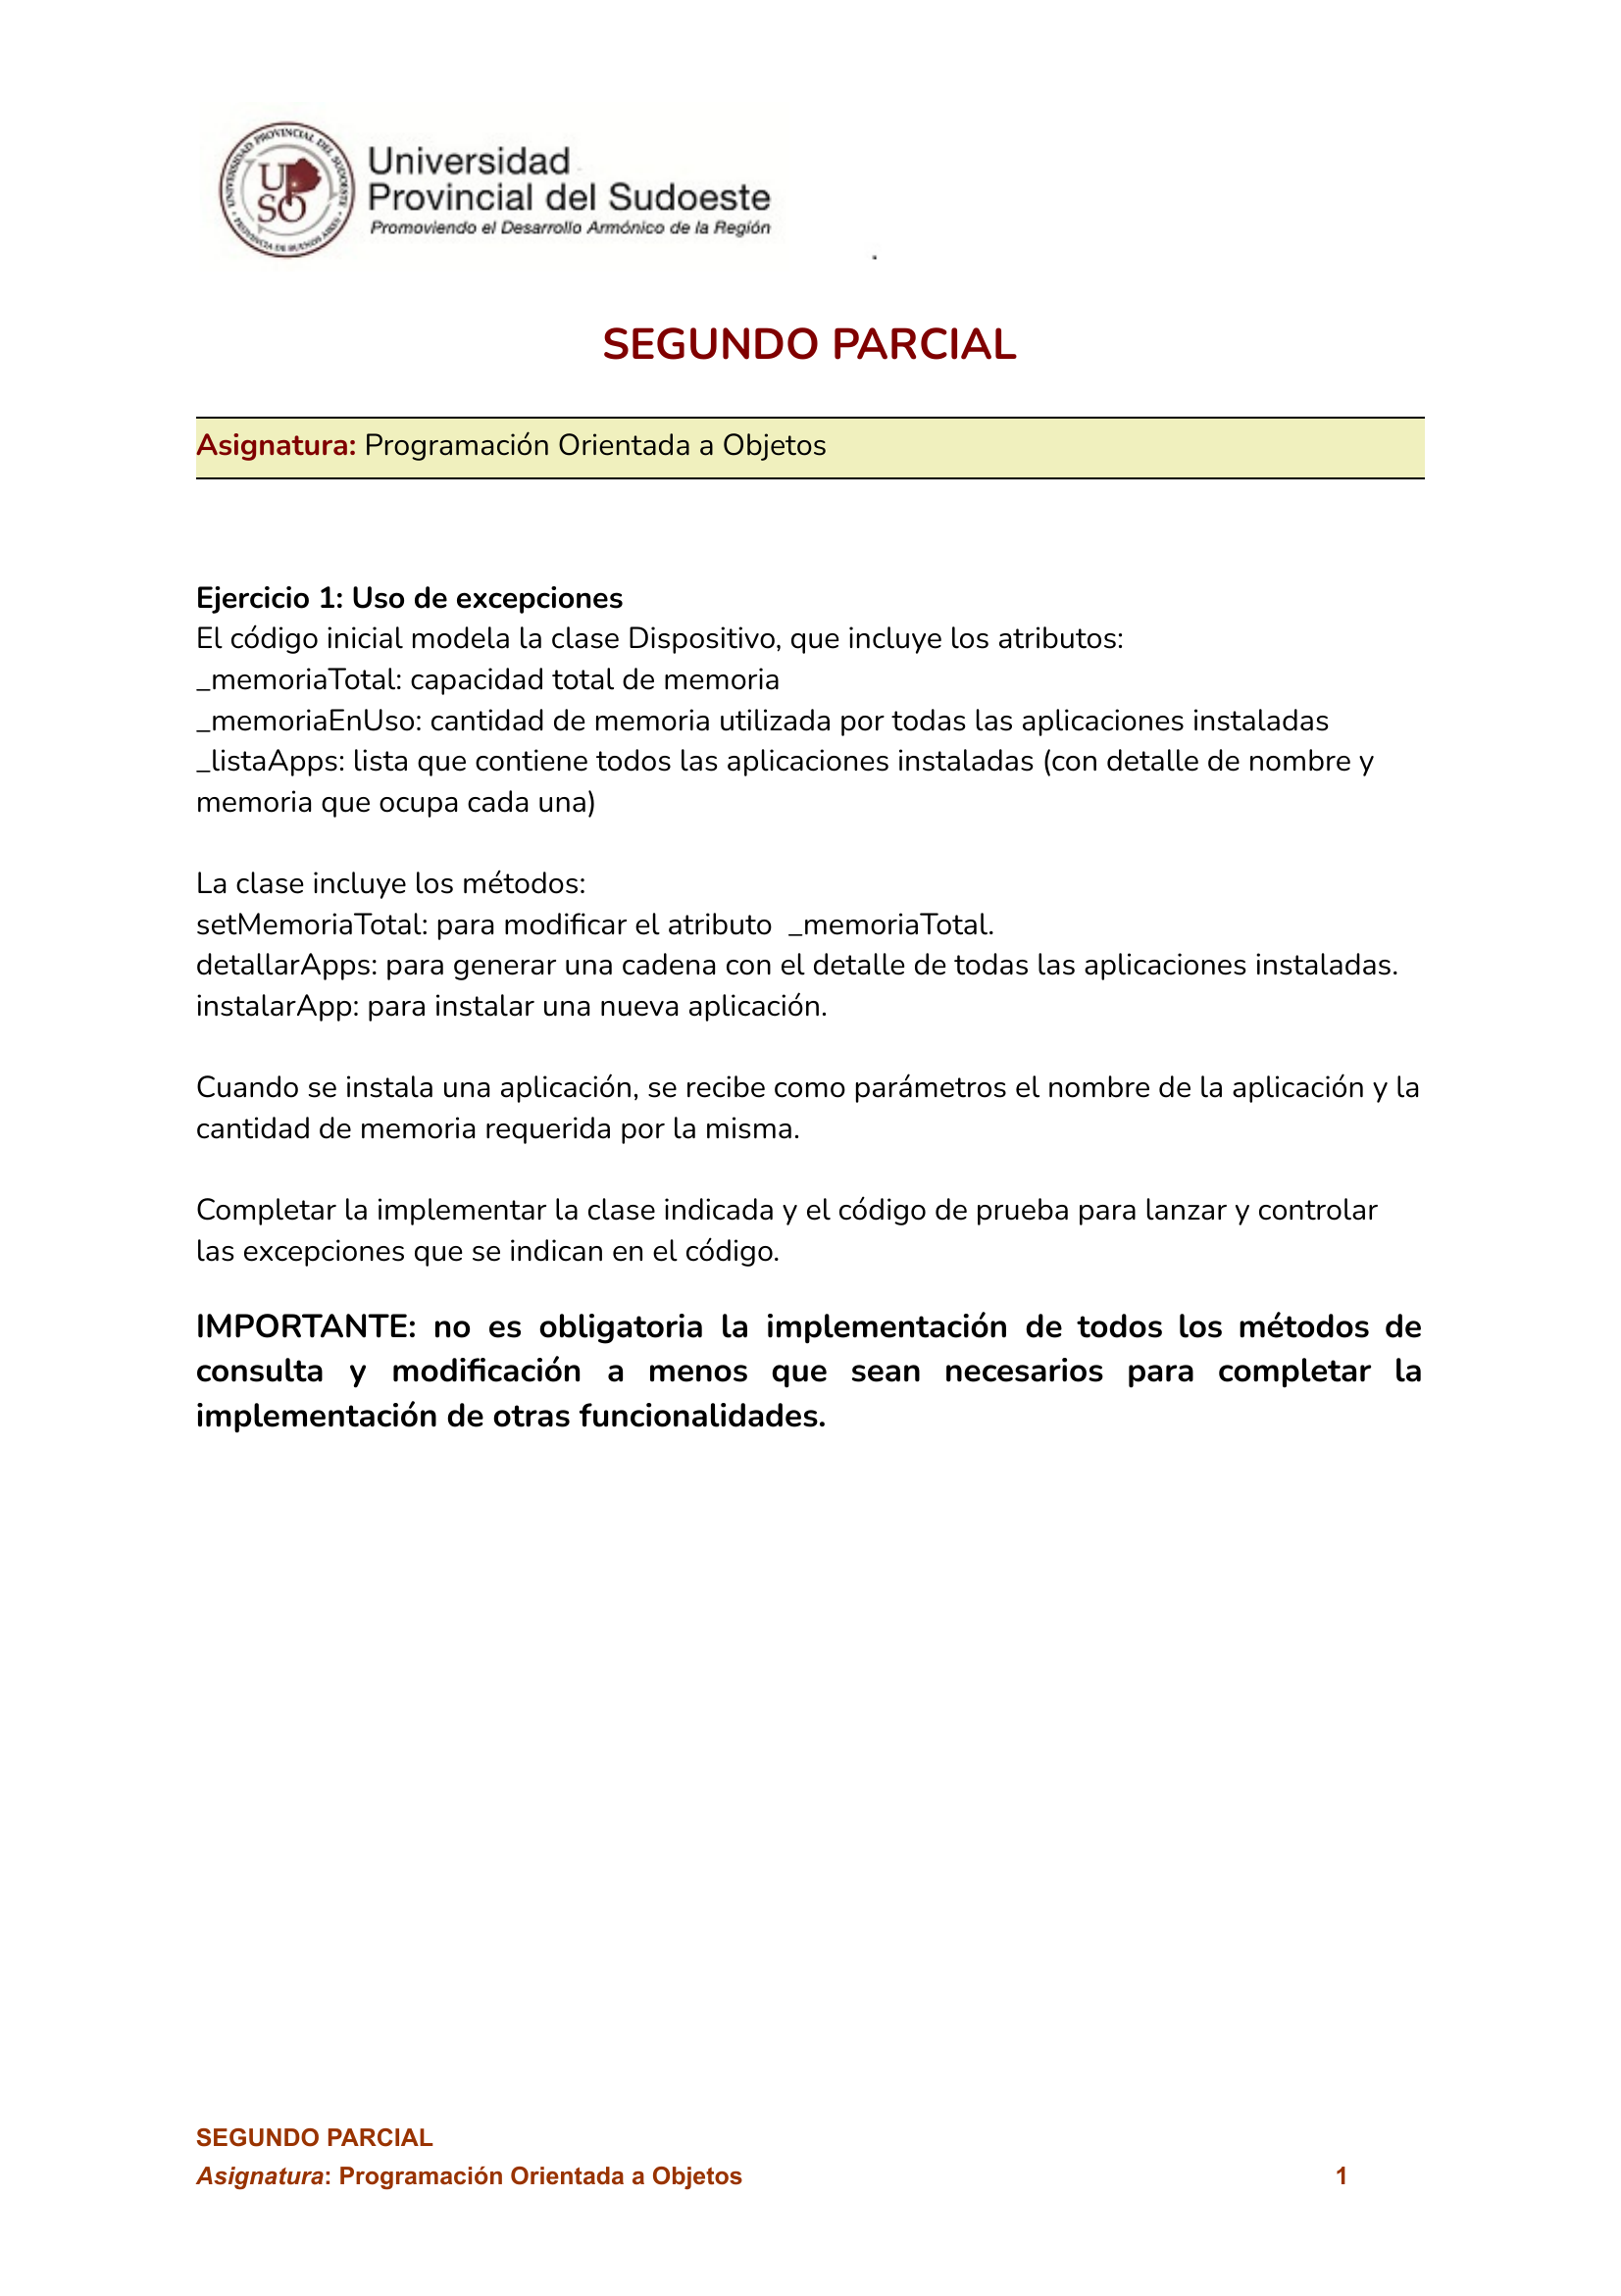

In [19]:
from pdf2image import convert_from_path
import PyPDF2  
from IPython.display import display

# Convertir el PDF a una imagen
images = convert_from_path('SEGUNDO_PARCIAL.pdf')

# Mostrar la imagen
images[0].show()

display(images[0])

# ***Ejercicio 1: Uso de excepciones***

In [ ]:
# Juan Manuel Roccia


class MemoriaEnUsoError(Exception):
    def __init__(self, memoriaMinima):
        self.memoriaMinima = memoriaMinima


class AppExistenteError(Exception):
    def __init__(self, nombreApp):
        self._nombreApp = nombreApp


class MemoriaInsuficienteError(Exception):
    def __init__(self, memoriaFaltante):
        self._memoriaFaltante = memoriaFaltante


class Dispositivo:
    def __init__(self, memoriaTotal):
        self._memoriaTotal = memoriaTotal
        self._memoriaEnUso = 0
        self._listaApss = []  # almacena tuplas (nombre, memoria)

    def getMemoriaEnUso(self):
        return self._memoriaEnUso

    def detallarApps(self):
        print("Aplicaciones instaladas:")
        for app in self._listaApss:
            print(f"Aplicación: {app[0]}, consume {app[1]} mb")

    def setMemoriaTotal(self, nuevo):
        # Establece un nuevo valor de memoriaTotal
        # Parámetro: setMemoriaTotal(entero)
        # Condiciones:
        # 1) El nuevo valor debe ser mayor o igual a la memoriaEnUso,
        # de lo contrario se lanza una excepción MemoriaEnUsoError
        # 2) Si el parámetro no es del tipo correcto, se lanza una
        # excepción TypeError
        try:
            dispositivo = Dispositivo(100)
            dispositivo.instalarApp("App1", 10)
            dispositivo.instalarApp("App2", 20)
            dispositivo.detallarApps()
            dispositivo.setMemoriaTotal(50)
            dispositivo.detallarApps()
        except MemoriaEnUsoError as e:
            print(
                f"Error: la memoria en uso es mayor que la cantidad de memoria disponible: {e.memoriaMinima} mb"
            )
        except AppExistenteError as e:
            print(f"Error: la aplicación {e.nombreApp} ya se encuentra instalada")
        except MemoriaInsuficienteError as e:
            print(f"Error: memoria insuficiente, faltan {e.memoriaFaltante} mb")
        except TypeError as e:
            print(e)

        if isinstance(nuevo, int):
            if nuevo >= self._memoriaEnUso:
                self._memoriaTotal = nuevo
            else:
                raise MemoriaEnUsoError(self._memoriaEnUso)
        else:
            raise TypeError("El tipo de dato no es el adecuado")

    def instalarApp(self, nombre, memoriaRequerida):
        # Instala una nueva aplicación
        # Parámetros: instalarApp(String, entero)
        # Condiciones:
        # 1) Si ya la App ya se encuentra instalada, se lanza una
        # excepción AppExistenteError
        # 2) Si no hay memoria suficiente para la instalación de la
        # aplicación, se lanza una excepción MemoriaInsuficienteError
        # 3) Si alguno de los parámetros no es del tipo correcto, se lanza una
        # excepción TypeError
        if isinstance(nombre, str) and isinstance(memoriaRequerida, int):
            if not ((nombre, memoriaRequerida) in self._listaApss):
                if memoriaRequerida <= (self._memoriaTotal - self._memoriaEnUso):
                    self._listaApss.append((nombre, memoriaRequerida))
                    self._memoriaEnUso += memoriaRequerida
                else:
                    raise MemoriaInsuficienteError(memoriaRequerida)
            else:
                raise AppExistenteError(nombre)
        else:
            raise TypeError("Error de tipo de dato, en el nombre o la memoriaRequerida")

In [ ]:
# Juan Manuel Roccia
# from ejercicio1 import *

#Implementación
disp1 = Dispositivo(5000)

disp1.instalarApp("App1", 4000)
disp1.detallarApps()
print('================================')
# Debe controlar la excepción MemoriaEnUsoError
try:
	disp1.setMemoriaTotal(3000)
except Exception as ex:
	if isinstance(ex,MemoriaEnUsoError):
		print(f'Error: MemoriaEnUsoError, la memoria debe ser al menos {disp1.getMemoriaEnUso()}mb')
# Mensaje a mostrar: "Error: la memoria debe ser al menos 4000mb"

# Debe controlar la excepción TypeError
try:
	disp1.setMemoriaTotal("a")
except Exception as ex:
	if isinstance(ex,TypeError):
		print('Error: TypeError debe ser un valor entero')
# Mensaje a mostrar: "Error: la memoria debe ser un valor entero"

# Debe controlar la excepción AppExistenteError
try:
	disp1.instalarApp("App1", 4000)
except Exception as ex:
	if isinstance(ex,AppExistenteError):
		print('Error: AppExistenteError, la aplicacion se encuentra instalada')
# Mensaje a mostrar: "Error: la aplicación App1 ya se encuentra instalada"

# Debe controlar la excepción MemoriaInsuficienteError
try:
	disp1.instalarApp("App2", 1500)
except Exception as ex:
	if isinstance(ex,MemoriaInsuficienteError):
		print('Error: MemoriaInsuficienteError, se necesita mas memoria, mas che...')
# Mensaje a mostrar: "Error: se necesitan 500mb de memoria adicionales"

# Debe controlar la excepción TypeError
try:
	disp1.instalarApp(1500, 1500)
except Exception as ex:
	if isinstance(ex,TypeError):
		print('Error: TypeError, El nombre de la app debe ser un string')
	elif isinstance(ex,MemoriaEnUsoError): # es de prueba, lo agregamos en la practica para saber que tipo de error capturamos con el ex
		print('otro mensaje de error')
# Mensaje a mostrar: "Error: el nombre de la App debe ser de tipo String"

# Segunda página - PDF

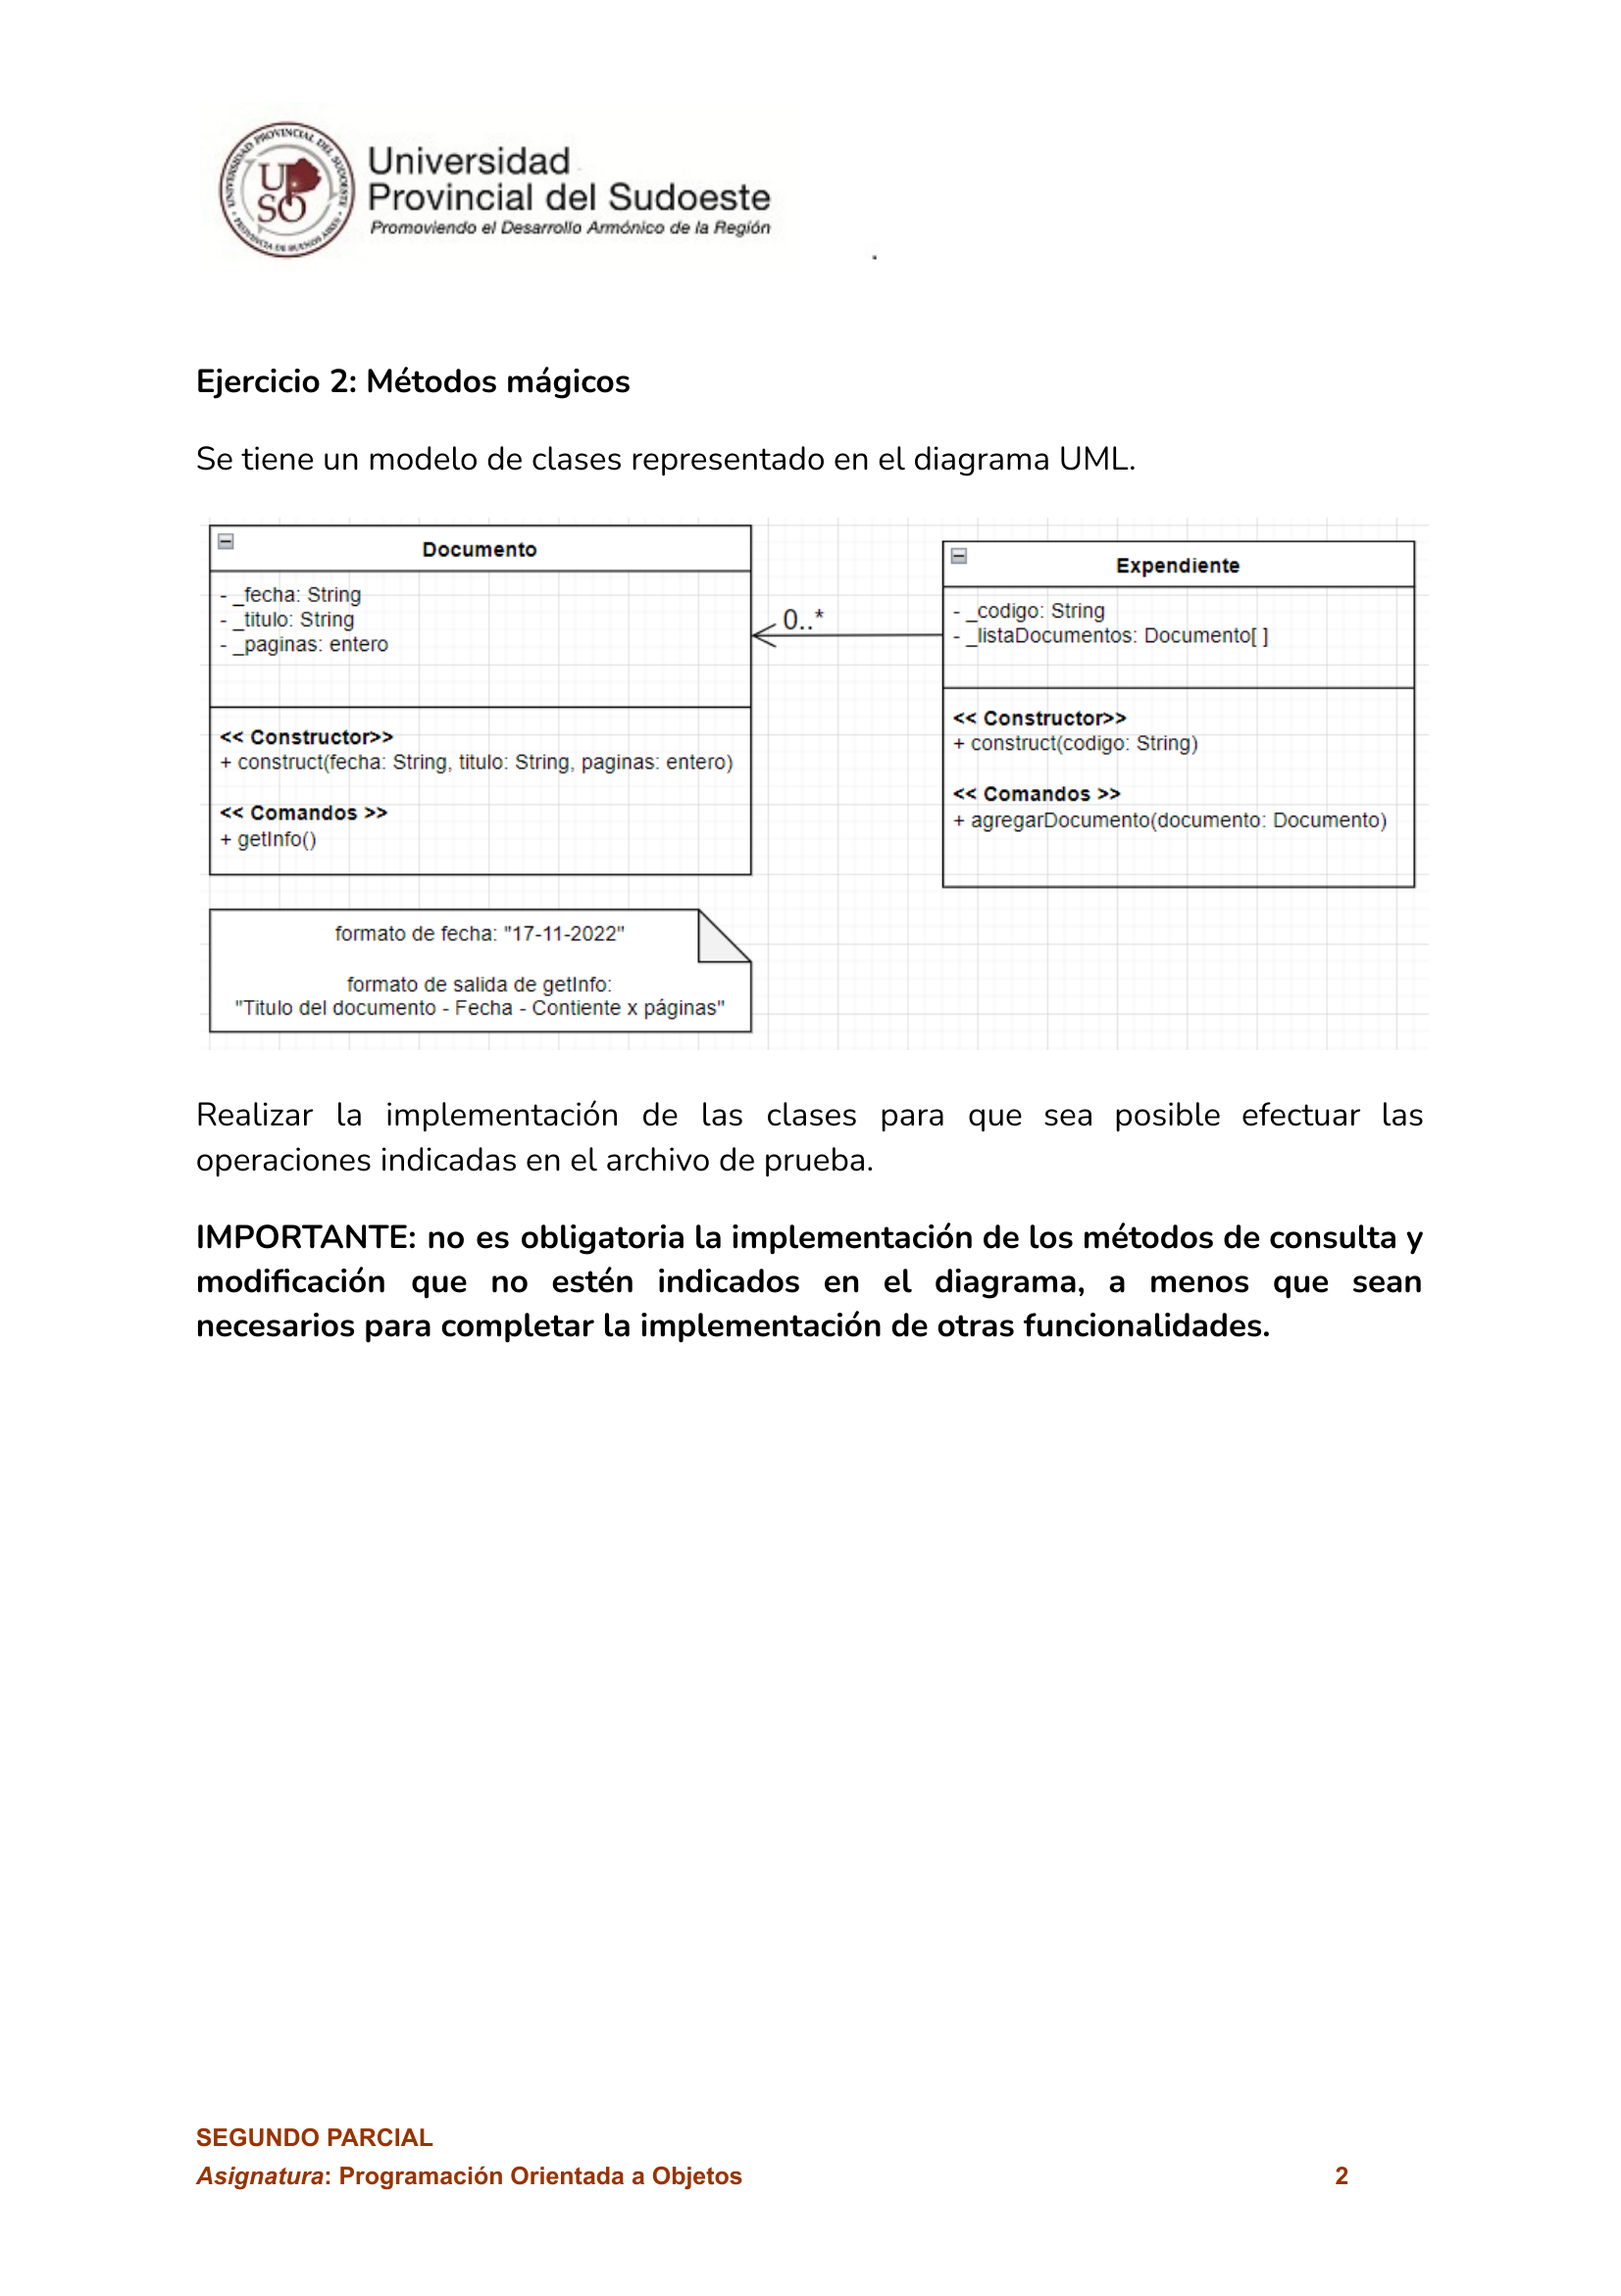

In [20]:
display(images[1])

# ***Ejercicio 2: Métodos mágicos***

In [ ]:
# Juan Manuel Roccia

class Documento:
    def __init__(self, fecha, titulo, paginas):
        self._fecha = fecha
        self._titulo = titulo
        self._paginas = paginas

    def getPaginas(self):
        return self._paginas

    def getInfo(self):
        return f'{self._titulo} - {self._fecha} - Contiene {self._paginas} paginas'

    def __lt__(self,other):
        return self._paginas < other.getPaginas()

    

class Expediente:
    def __init__(self, codigo):
        self._codigo = codigo
        self._listaDocumentos = []

    def agregarDocumento(self,nuevo):
        self._listaDocumentos.append(nuevo) 

    def __iter__(self): # tambien se puede resolver con el next, que es lo mas correcto, pero si no les salia, podian hacerlo con el yield
        for doc in self._listaDocumentos:
            yield doc

    def __len__(self):
        return len(self._listaDocumentos)

In [ ]:
# Juan Manuel Roccia
# from ejercicio2 import *
# Implementación

# Crear tres documentos ***************************************************
# (modificar el código)
doc1 = Documento('12-12-2019','titulo1',5)
doc2 = Documento('12-12-2020','titulo2',10)
doc3 = Documento('12-12-2021','titulo3',15)

# Comparar dos documentos *************************************************
# (NO modificar el código, completar implementación de las clases)
if (doc1 < doc2):
    print("El documento 1 tiene menos páginas que el documento 2")

# Crear un expediente *****************************************************
# (modificar el código)
expediente1 = Expediente('001')

# Agregar los tres documentos al expediente ******************************
# (completar el código)
expediente1.agregarDocumento(doc1)
expediente1.agregarDocumento(doc2)
expediente1.agregarDocumento(doc3)

# Mostrar información de los documentos agregados
# (NO modificar el código, completar implementación de las clases)
for documento in expediente1:
    print(documento.getInfo())

# Mostrar la cantidad de documentos en el expediente
# (NO modificar el código, completar implementación de las clases)
print(len(expediente1))  # resultado esperado: 3

# Tercera página - PDF

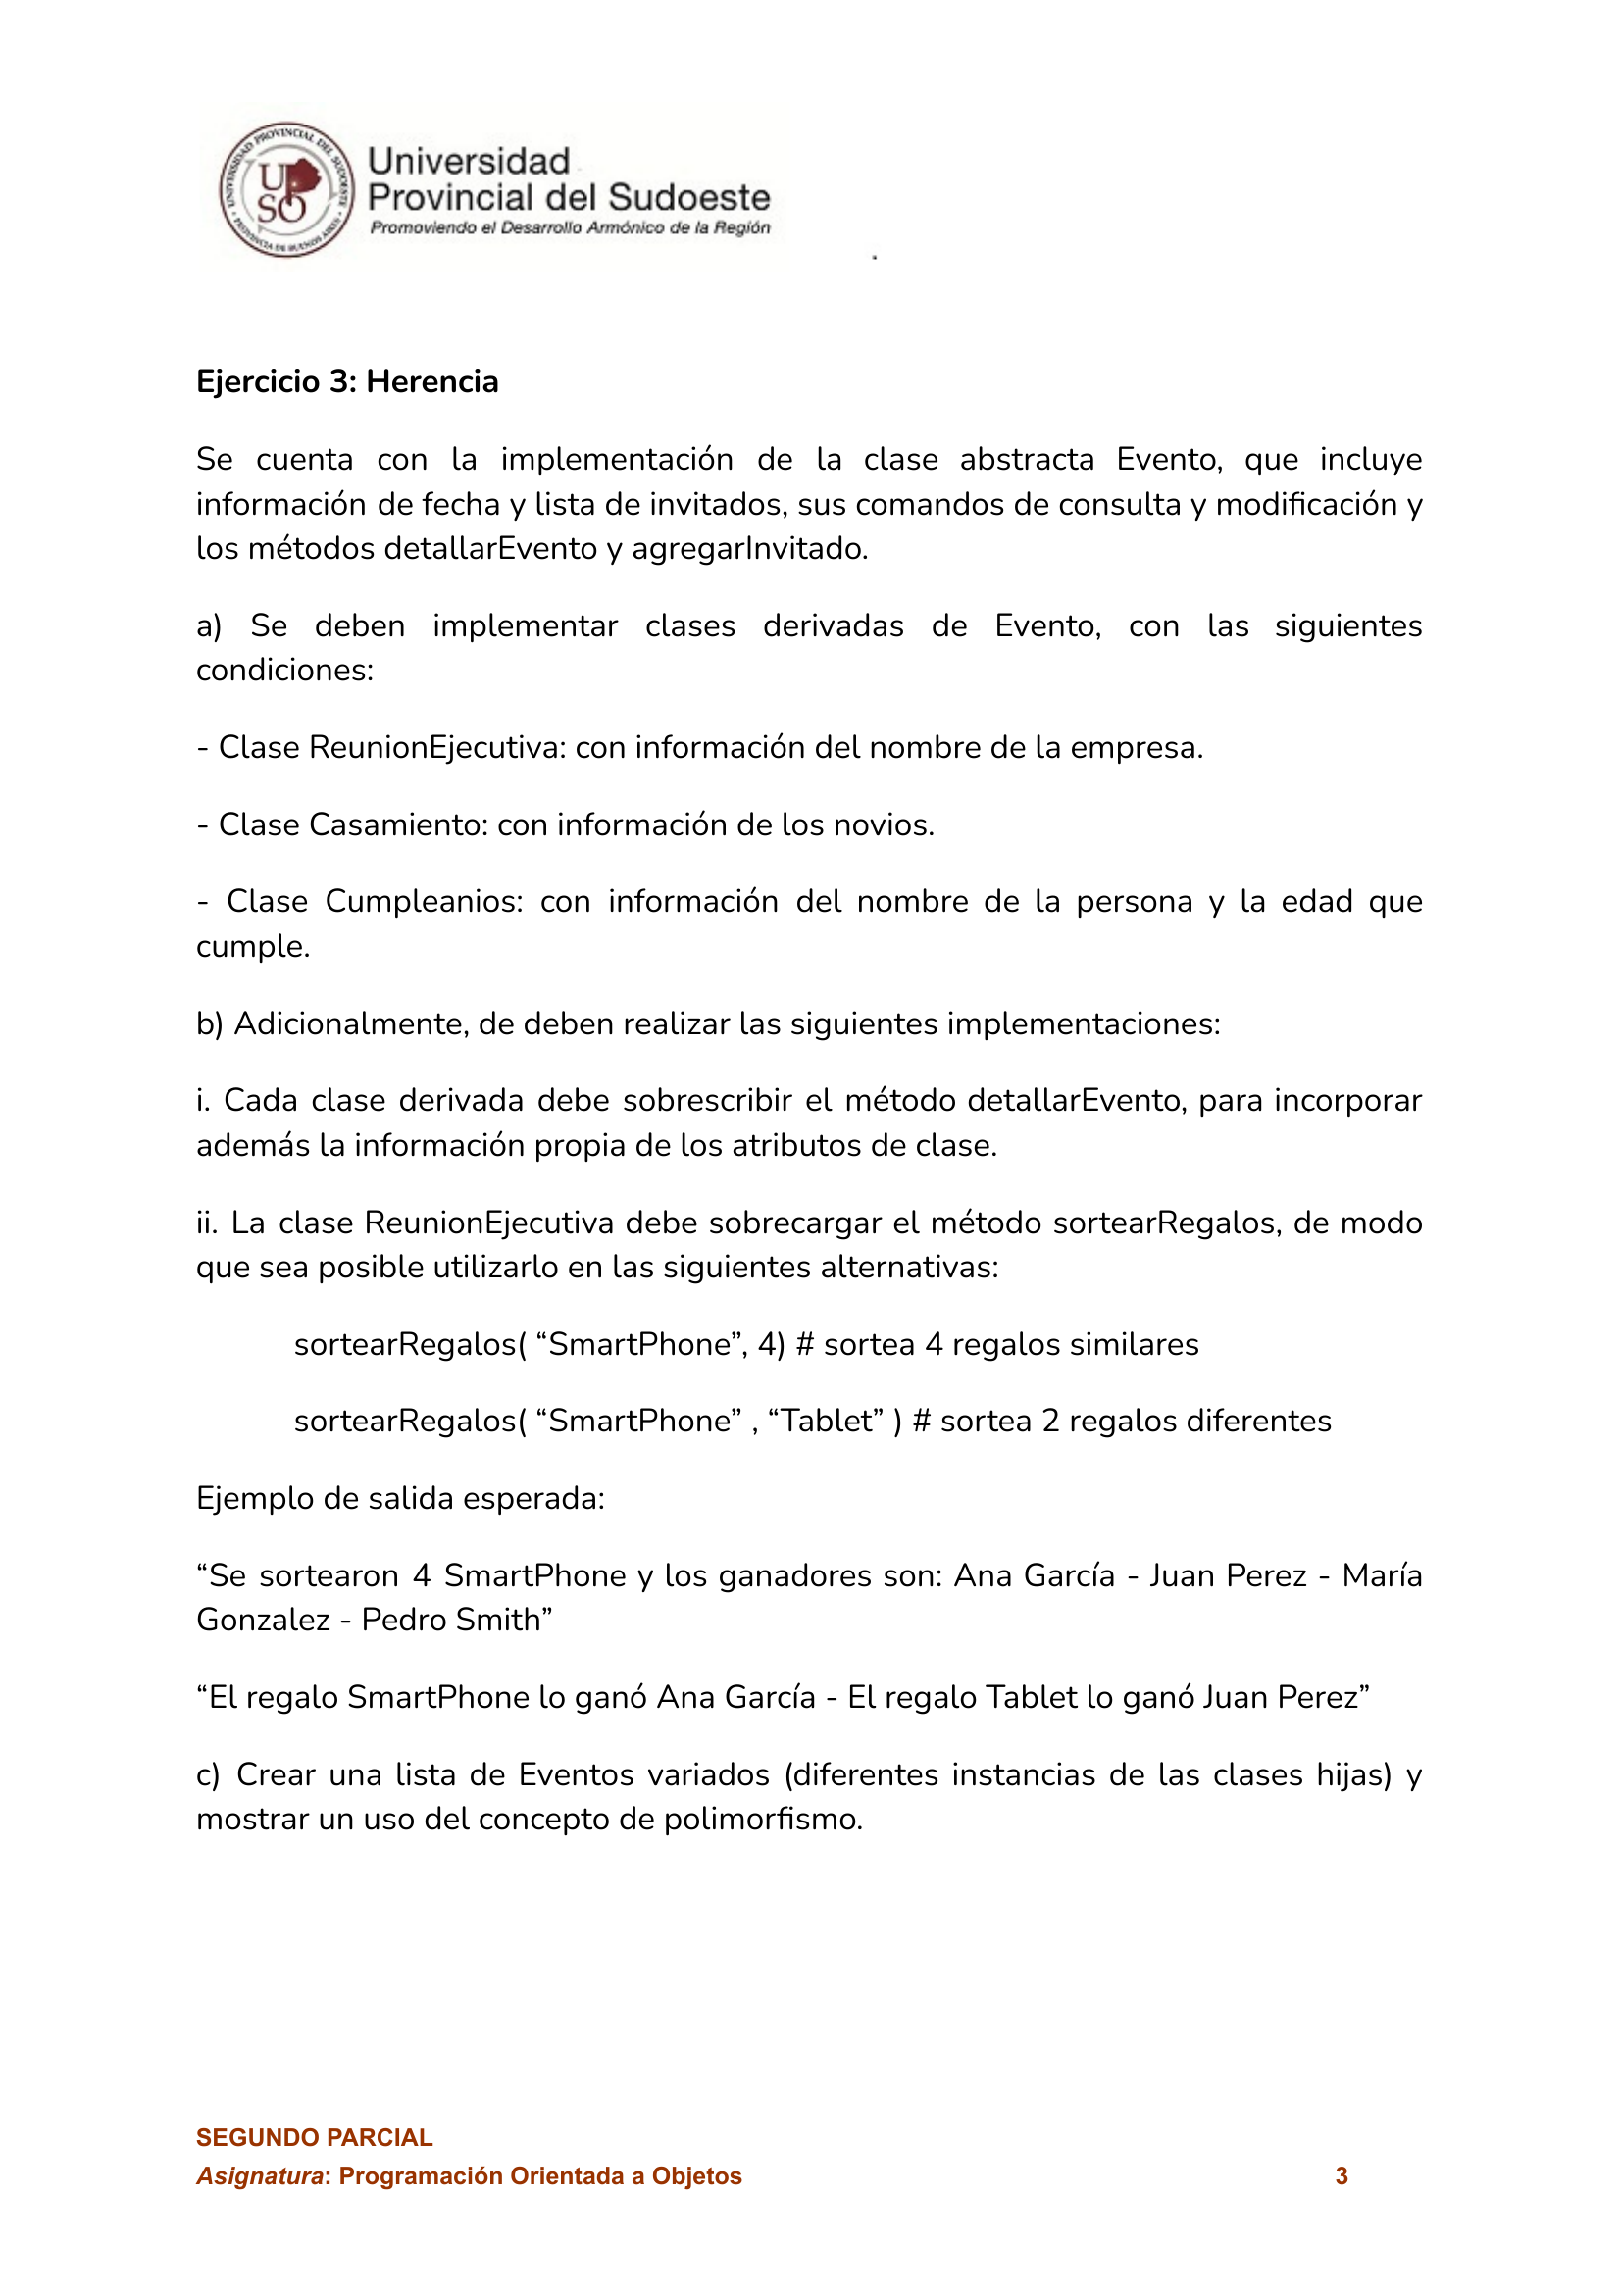

In [21]:
display(images[2])

# ***Ejercicio 3: Herencia***

In [ ]:
# Juan Manuel Roccia

import random
from abc import ABCMeta, abstractmethod

# NO MODIFICAR LA CLASE EVENTO
class Evento(metaclass=ABCMeta):
    def __init__(self, fecha):
        self._fecha = fecha
        self._listaInvitados = []

    def getInvitados(self):
        return self._listaInvitados

    def agregarInvitado(self, nombreInvitado):
        self._listaInvitados.append(nombreInvitado)

    def detallarEvento(self):
        return f" Fecha del evento: {self._fecha}, Cantidad de invitados: {len(self._listaInvitados)}"

    @abstractmethod
    def postergarEvento(self, nuevaFecha):
        pass

class ReunionEjecutiva(Evento):
    def __init__(self,nombreEmpresa,fecha):
        super().__init__(fecha)
        self._nombreEmpresa = nombreEmpresa

    def sortearRegalos(self,*args):
        lista = self.getInvitados()
        ganadores = []
        if isinstance(args[0],str) and isinstance(args[1], int):
            pass # sortear el mismo regalo
            premios = args[0]
            regalos = args[1]
            while regalos!=0 and (len(lista)!=len(ganadores)):
                #obtengo un nombre al azar
                #pregunto si esta en la lista ganadores, si no esta lo agrego
                unGanador = lista[random.randint(0,len(lista)-1)]
                if not(unGanador in ganadores):
                    ganadores.append(unGanador)
                    regalos -=1
        else:
            pass # sortear dos regalos distintos
            premios = f'{args[0]} y {args[1]} respectivamente'
            regalos = 2
            while regalos!=0 and (len(lista)!=len(ganadores)):
                #obtengo un nombre al azar
                #pregunto si esta en la lista ganadores, si no esta lo agrego
                unGanador = lista[random.randint(0,len(lista)-1)]
                if not(unGanador in ganadores):
                    ganadores.append(unGanador)
                    regalos -=1

        mensaje = '' # el que voy a mostrar
        for ganador in ganadores:
            mensaje = mensaje + ganador+' - '

        return f'los ganadores son: {mensaje} de {premios}'


    def detallarEvento(self):
        return f'Esto es una reunion ejecutiva de la empresa {self._nombreEmpresa}, vamos de elegante sport'

    
    def postergarEvento(self, nuevaFecha):
        pass

class Casamiento(Evento):
    def __init__(self,novioNombre,noviaNombre,fecha):
        super().__init__(fecha)
        self._nombreNovio = novioNombre
        self._nombreNovia = noviaNombre

    def detallarEvento(self):
        return f'Esto es un casamiento de {self._nombreNovio} y {self._nombreNovia}...'

    
    def postergarEvento(self, nuevaFecha):
        pass

class Cumpleanios(Evento):
    def __init__(self,nombre, edadCumple, fecha):
        super().__init__(fecha)
        self._nombre = nombre
        self._edadCumple = edadCumple

    def detallarEvento(self):
        return f'Este es mi cumple y voy a llorar si quiero - dijo {self._nombre} en su cumple de {self._edadCumple}..'

   
    def postergarEvento(self, nuevaFecha):
        pass

In [ ]:
# Juan Manuel Roccia
# from ejercicio3 import *

# Implementación
miReunionEjecutiva = ReunionEjecutiva('EmpresaBuenaFortuna','31/12/2022')

miReunionEjecutiva.agregarInvitado('invitado1')
miReunionEjecutiva.agregarInvitado('invitado2')
miReunionEjecutiva.agregarInvitado('invitado3')
miReunionEjecutiva.agregarInvitado('invitado4')
miReunionEjecutiva.agregarInvitado('invitado5')
miReunionEjecutiva.agregarInvitado('invitado6')
miReunionEjecutiva.agregarInvitado('invitado7')
miReunionEjecutiva.agregarInvitado('invitado8')

print(miReunionEjecutiva.sortearRegalos('moto',5))

print('===================================')
miCumpleanios = Cumpleanios('carlos',30,'27/07/91')
miCasamiento = Casamiento('carlos','alguien','indefinido')
lista =[miReunionEjecutiva,miCumpleanios,miCasamiento]
for evento in lista:
	print(evento.detallarEvento())